<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/marco-canas/machine_learning/blob/main/problems_bank/parcial_2_clasificacion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
</table> 

# Clasificación Multiclase práctica de codificación. 

## [Video de apoyo](https://www.youtube.com/watch?v=W0vFtltZTBc)

1. Tome el dataset `load_digits` y 
* constituya el arreglo de imágenes $X$ y 
* el de etiquetas $y$ 

como arreglos de numpy de valores de tipo `int64`. 

In [1]:
from sklearn.datasets import load_digits 

In [3]:
iris = load_digits() 

In [4]:
X,y = load_digits(return_X_y = True)

In [5]:
X.shape 

(1797, 64)

In [7]:
import numpy as np 
X = X.astype(np.int64)

In [8]:
X[0]

array([ 0,  0,  5, 13,  9,  1,  0,  0,  0,  0, 13, 15, 10, 15,  5,  0,  0,
        3, 15,  2,  0, 11,  8,  0,  0,  4, 12,  0,  0,  8,  8,  0,  0,  5,
        8,  0,  0,  9,  8,  0,  0,  4, 11,  0,  1, 12,  7,  0,  0,  2, 14,
        5, 10, 12,  0,  0,  0,  0,  6, 13, 10,  0,  0,  0], dtype=int64)

In [9]:
y.shape

(1797,)

In [10]:
y[0]

0

2. Visualice con la función`imshow()` de matplotlib una de las imagenes del dataset. 

In [11]:
import matplotlib.pyplot as plt 

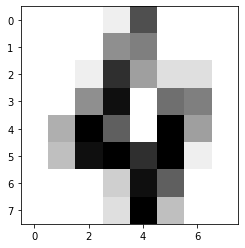

In [18]:
plt.imshow(X[4].reshape(8,8), cmap = 'binary') 

In [19]:
y[4]

4

3. Divida el dataset en un subconjunto para entrenamiento y un subconjunto de testeo, pero para esta tarea relice muestreo estratificado utilizando la clase `StratifiedShuffleSplit` del `model_selection` de Sklearn.  

* **(opcional)** y muestre con histogramas que este muestreo ha quedado de manera estratificada, es decir, las muestras quedaron de tal menera que cada digito en la muestra esta presente en la misma proporción que en el dataset total. 

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit 

In [23]:
sss = StratifiedShuffleSplit(n_splits = 1, random_state = 42,\
                             test_size = 0.2)  

In [24]:
for train_index, test_index in sss.split(X,y):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index] 

In [25]:
len(X_train)/len(X)

0.7996661101836394

In [26]:
len(X_test)/len(X)

0.2003338898163606

(array([36., 36., 35., 37., 36., 37., 36., 36., 35., 36.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <BarContainer object of 10 artists>)

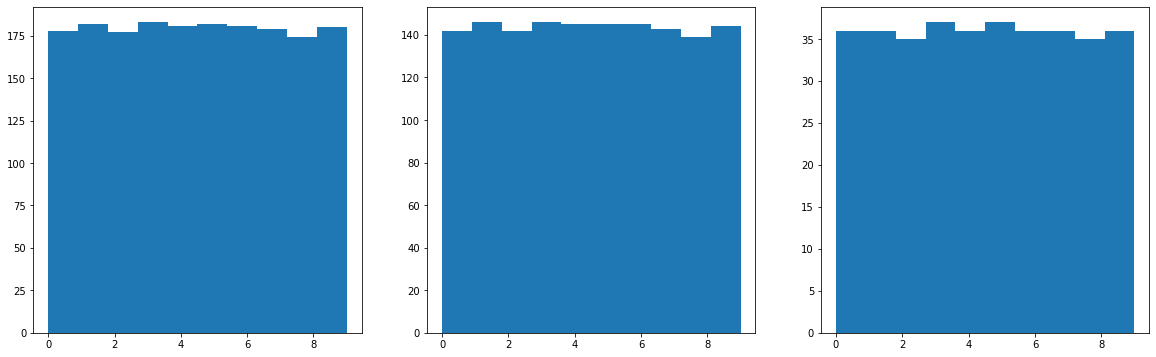

In [27]:
fig, ax = plt.subplots(1,3, figsize = (20,6)) 

ax[0].hist(y)
ax[1].hist(y_train)
ax[2].hist(y_test)

4. Escale los datos con utilizando la clase `MaxMinScaler` o la clase `StandardScaler` del módulo `preprocessing` de sklearn. 

In [28]:
from sklearn.preprocessing import StandardScaler  

In [29]:
escalador = StandardScaler()

In [31]:
X_train_escalado = escalador.fit_transform(X_train)

5. Instancie y entrene los modelos `SGDClassifier(random_state = 42)` del módulo `linear_model` y el `RandomForestClassifier(random_state = 42)` del módulo `ensemble` de sklearn. 

In [32]:
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier 

In [33]:
sgd_clf = SGDClassifier(random_state = 42)
forest_clf = RandomForestClassifier(random_state = 42) 


In [34]:
sgd_clf.fit(X_train_escalado, y_train)
forest_clf.fit(X_train_escalado, y_train) 

RandomForestClassifier(random_state=42)

6. Mida sus desempeños con la metodología de Validación cruzada (utilice la función cross_val_score del módulo `model_selection` de sklearn con `scoring = 'accuracy'`) y luego afine el modelo seleccionado con la metodología de Grilla de hiperparámetros (`GridSearchCV(scoring = 'f1_macro'`)). 

* Para el SGDClassifier utilice los pararámetros de `alpha` con valores $[10^{-1}, 10^{-2}]$, `learning_rate` con valores en la lista `[0.1,0.01, 0.001]` y `penalty` con valores en la lista `['l1', 'l2']`.

* Para el RandomForestClassifier utilice los parametros `max_depth` con valores en la lista `[10,15,20]`, `max_features` con valores en la lista `[3,5,7]` y `n_estimators` con valores en la lista `[100,150,200]`.

Capture el mejor modelo utilizando el atributo de inspección `best_estimator_`

In [35]:
from sklearn.model_selection import cross_val_score 

In [37]:
puntajes_exactitud_sgd = cross_val_score(sgd_clf, \
                                         X_train_escalado, y_train, \
                                        cv = 3, scoring = 'accuracy')

puntajes_exactitud_forest = cross_val_score(forest_clf, \
                                         X_train_escalado, y_train, \
                                        cv = 3, scoring = 'accuracy')

In [38]:
puntajes_exactitud_sgd

array([0.94572025, 0.95824635, 0.9394572 ])

In [39]:
puntajes_exactitud_forest

array([0.97703549, 0.97494781, 0.96033403])

# Afinemos el modelo seleccionado 

In [40]:
grid_param = {
    'max_depth': [10,15,20],\
    'max_features':[3,5,7],\
    'n_estimators':[100, 150, 200]
}

In [41]:
from sklearn.model_selection import GridSearchCV 

In [43]:
grid_forest = GridSearchCV(forest_clf, grid_param, cv = 3,\
                           scoring = 'f1_macro')

In [44]:
%%time 
grid_forest.fit(X_train_escalado, y_train) 

GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [10, 15, 20], 'max_features': [3, 5, 7],
                         'n_estimators': [100, 150, 200]},
             scoring='f1_macro')

In [45]:
mejor_modelo = grid_forest.best_estimator_

In [46]:
cross_val_score(mejor_modelo, X_train_escalado, y_train,\
               cv = 3, scoring = 'accuracy') 

array([0.98121086, 0.97077244, 0.96242171])

7. Verifique que el desempeño en el conjunto de testeo es cercano al determinado en el conunto de entrenamiento. 
  * cuantifique el desmpeño de su modelo final en el conjunto de testeo usando el método `.score(X_test, y_test)`

In [48]:
X_test_escalado = escalador.transform(X_test) 

In [49]:
cross_val_score(mejor_modelo, X_test_escalado, y_test,\
               cv = 3, scoring = 'accuracy') 

array([0.88333333, 0.94166667, 0.95      ])

In [58]:
y_train_pred = cross_val_predict(mejor_modelo, X_train_escalado, y_train,\
                                cv = 3)

In [59]:
mc_train = confusion_matrix(y_train, y_train_pred) 
row_sums = mc_train.sum(axis=1, keepdims=True)
mc_train_normalizada = mc_train/row_sums
for i in range(10):
    print(mc_train_normalizada[i,i]) 

0.9929577464788732
1.0
0.9859154929577465
0.958904109589041
0.9862068965517241
0.9586206896551724
0.9724137931034482
0.9790209790209791
0.9280575539568345
0.9513888888888888


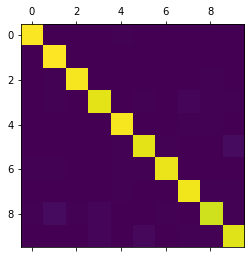

In [60]:
plt.matshow(mc_train_normalizada)

8. **(Opcional)** Muestre con `matshow()` la matriz de confusion del conjunto de testeo. Para construir esta matriz de confusión debe comparar las etiquetas de testeo con las predicciones del modelo afinado en este mismo conjunto. 

In [50]:
from sklearn.model_selection import cross_val_predict 
from sklearn.metrics import confusion_matrix

In [52]:
y_test_pred = cross_val_predict(mejor_modelo, X_test_escalado, y_test,\
                                cv = 3)

In [63]:
mc_test = confusion_matrix(y_test, y_test_pred) 

In [64]:
row_sums = mc_test.sum(axis=1, keepdims=True)
mc_test_normalizada = mc_test/row_sums
for i in range(10):
    print(mc_test_normalizada[i,i]) 

0.9722222222222222
0.9444444444444444
0.9142857142857143
0.972972972972973
0.9166666666666666
0.972972972972973
0.9166666666666666
0.9722222222222222
0.8285714285714286
0.8333333333333334


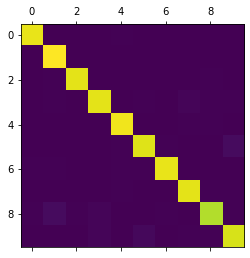

In [65]:
plt.matshow(mc)

plt.savefig('mc_test.jpg')

## Referencias  

* La clase MaxMinScaler: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html  

* RandomForestClassifier: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html 
